# <font color='red'>**Business Case: Aerofit - Descriptive Statistics & Probability**</font>



## **About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.



**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: Aerofit_treadmill.csv

* Product Purchased:	KP281, KP481, or KP781
* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in $)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week

Product Portfolio:

* The KP281 is an entry-level treadmill that sells for $1,500.

* The KP481 is for mid-level runners that sell for $1,750.

* The KP781 treadmill is having advanced features that sell for $2,500.

# **1. Importing dataset and libraries**

In [79]:
#importing Aerofit dataset from drive
!gdown 1TUyktdols5RPgYpq20roS1-Rh23h_4y-

Downloading...
From: https://drive.google.com/uc?id=1TUyktdols5RPgYpq20roS1-Rh23h_4y-
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 18.3MB/s]


In [80]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### <font color='green'>Loading the dataset

In [81]:
data=pd.read_csv('aerofit_treadmill.csv')

#### <font color='green'>Dispalying the sample dataset

In [82]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### <font color='green'>Understanding the data



In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [84]:
#check for missing values
data.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


<font color='blue'>**Our understanding of the data**</font>
<font color='green'>
* Total features - **9**
* Total records - **180**
* Categorical Variables: **Product, Gender, MaritalStatus**
* Numerical Variables: **Age, Education, Usage, Fitness, Income, Miles**
* No Missing Values were found.</font>      

# **2. Outliers**

In [85]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


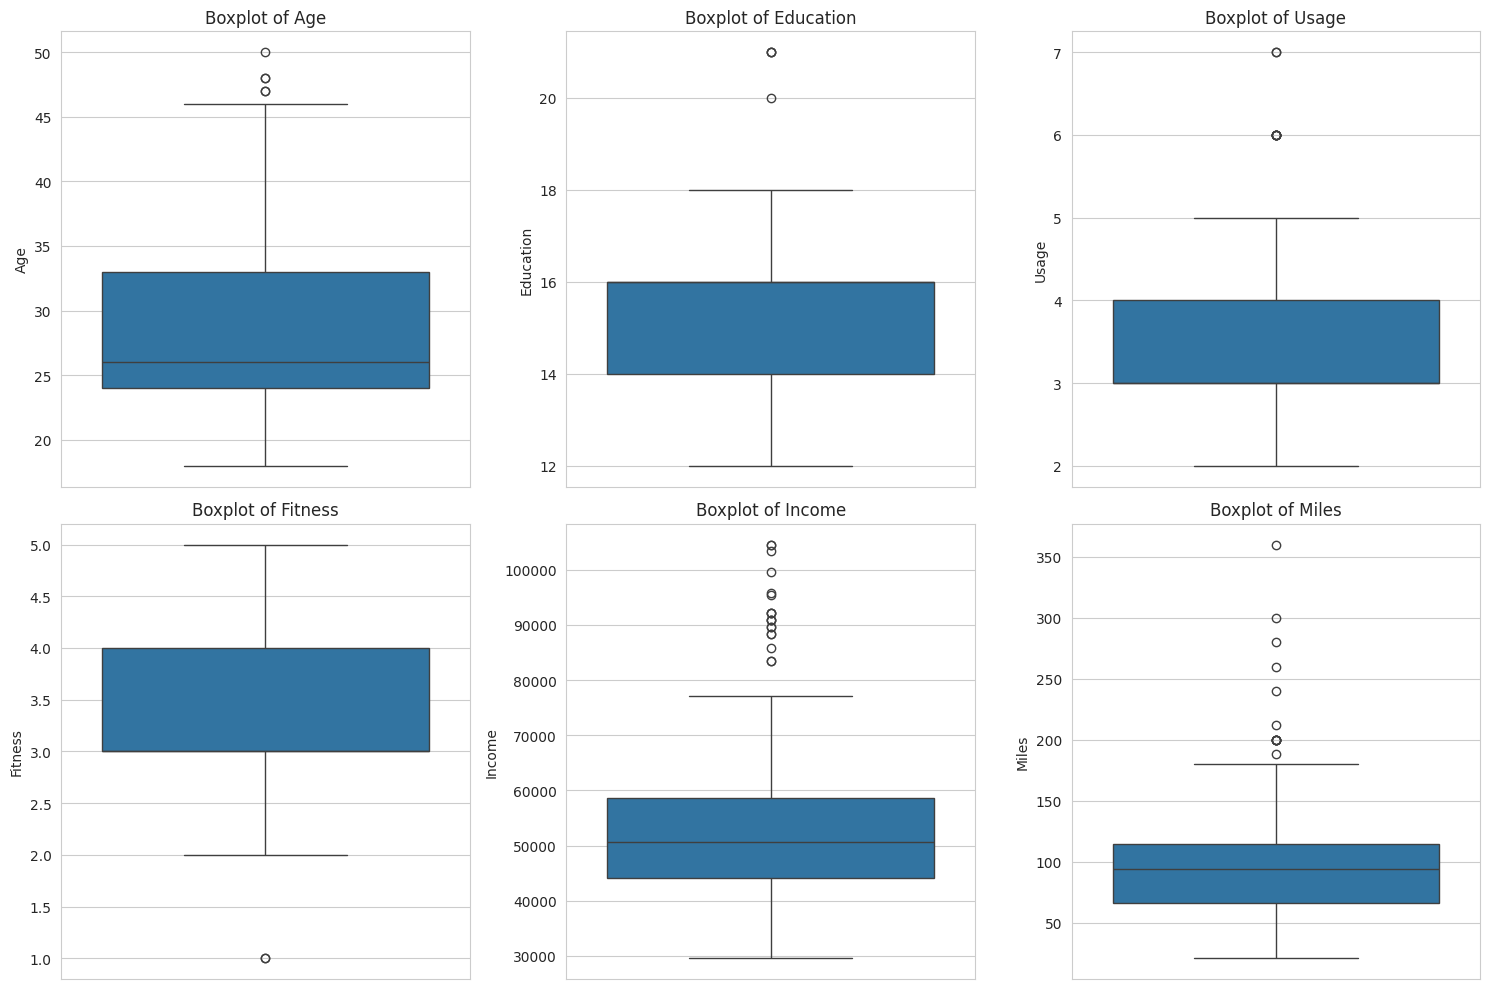

In [86]:
# Create a figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot each numerical feature separately
sns.boxplot(y=data["Age"], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Age")

sns.boxplot(y=data["Education"], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Education")

sns.boxplot(y=data["Usage"], ax=axes[0, 2])
axes[0, 2].set_title("Boxplot of Usage")

sns.boxplot(y=data["Fitness"], ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Fitness")

sns.boxplot(y=data["Income"], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of Income")

sns.boxplot(y=data["Miles"], ax=axes[1, 2])
axes[1, 2].set_title("Boxplot of Miles")

# Adjust layout
plt.tight_layout()
plt.show()

<font color='blue'>Observations from Boxplots:</font>

<font color='green'>

* Income & Miles have extreme outliers (some customers have very high income or run significantly more).
* Fitness & Education are well-distributed with no major outliers.
* Usage has a few people planning to use treadmills much more than others.</font>

# **3. Exploratory Data Analysis (EDA)**

## <font color='green'>Univariate Analysis

In [87]:
data['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [88]:
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [89]:
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


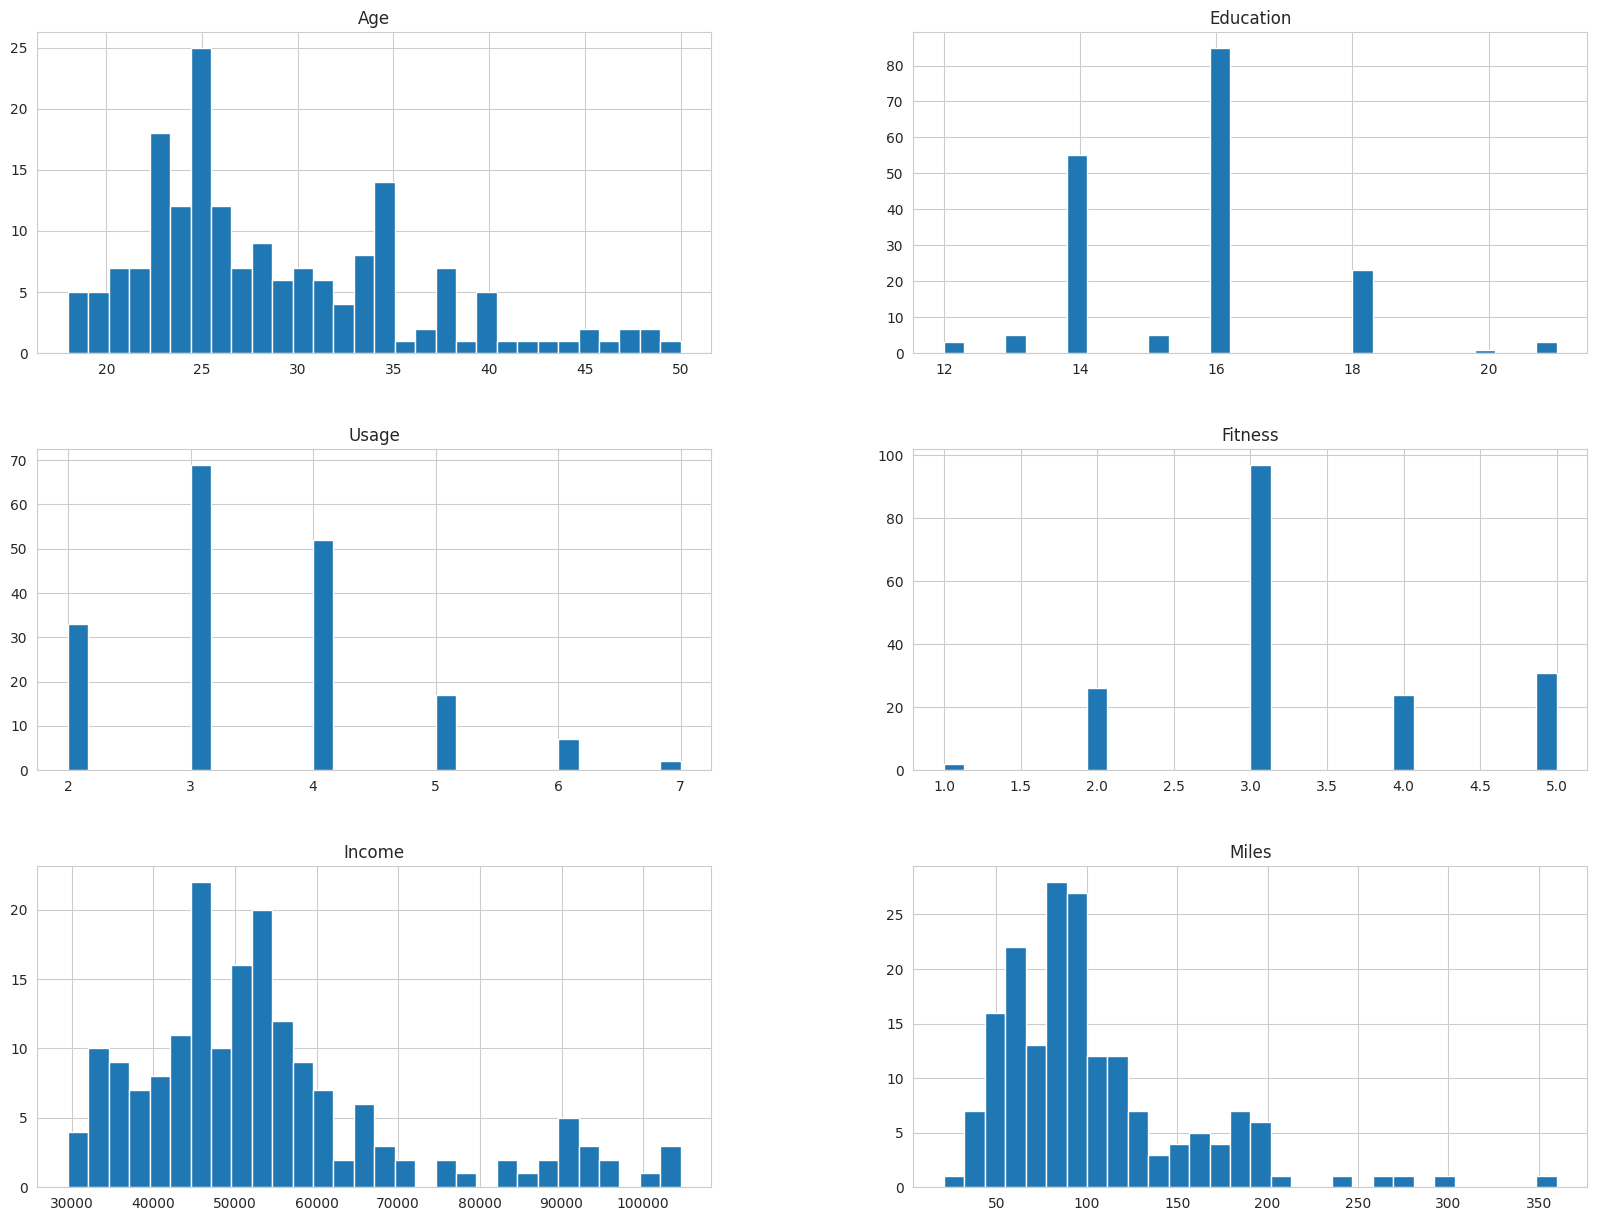

In [90]:
data.hist(bins=30,figsize=(20,15))
plt.show()

<font color='blue'>Observations from the histograms:</font>

<font color='green'>

*  Product Preference: Most customers purchased the entry-level KP281.
* Gender: More males purchased treadmills than females.
* Marital Status: More married customers (Partnered) purchased treadmills.
* Income & Miles: Skewed distribution with a few extreme values (outliers). </font>

## <font color='green'>Bivariate Analysis

In [91]:
data.groupby('Product')['Income'].mean()

,Income
Product,
KP281,46418.025
KP481,48973.650
KP781,75441.575


<font color='blue'>Observations from the table:</font>

<font color='green'>

*  Average income of customers who purchased the entry-level KP281 is 46K.
* Average income of customers who purchased the mid-level KP481 is 48K.
* Average income of customers who purchased the premium-level KP781 is 75K
</font>

Higher the salary, the adavnced is the model purchased.

In [92]:
data.groupby('Product')['Age'].mean()


,Age
Product,
KP281,28.55
KP481,28.90
KP781,29.10


<font color='blue'>Observations from the table:</font>

<font color='green'>

*  Average age of customers who purchased the entry-level KP281 is 28.5.
* Average age of customers who purchased the mid-level KP481 is 28.9.
* Average age of customers who purchased the premium-level KP781 is 29.1
</font>

Average age remains similar acroos models.

In [93]:
data.groupby('Product')['Fitness'].mean()


,Fitness
Product,
KP281,2.9625
KP481,2.9000
KP781,4.6250


In [94]:
data.groupby('Product')['Usage'].mean()


,Usage
Product,
KP281,3.087500
KP481,3.066667
KP781,4.775000


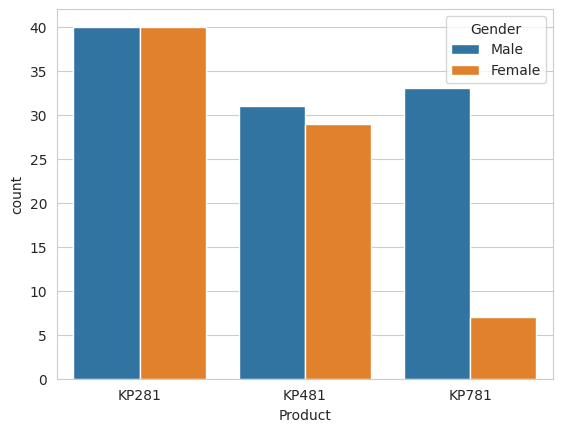

In [95]:
sns.countplot(data=data, x='Product', hue='Gender')
plt.show()

<font color='blue'>Observations from the Countplot:</font>

<font color='green'>

*  Both gender prefer KP281 and KP481 similarly.
* Males customers buy more than Female customers.
* More male customers prefer the premium model KP781 than the mid-level KP481.
</font>

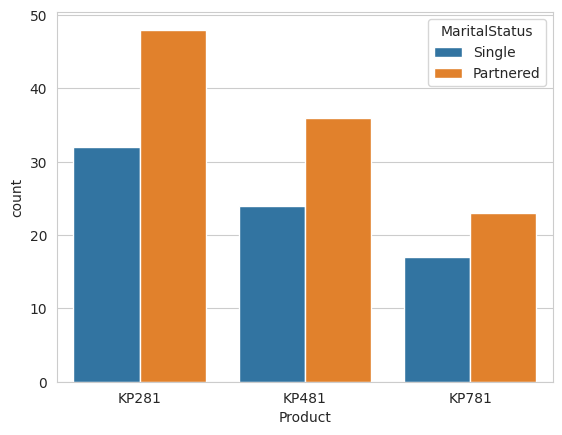

In [96]:
sns.countplot(data=data, x='Product', hue='MaritalStatus')
plt.show()

<font color='blue'>Observations from the Countplot:</font>

<font color='green'>

*  Married customers have upperhand in buying all three models.
* Both type of customers prefer KP281 more than other 2 models.
</font>

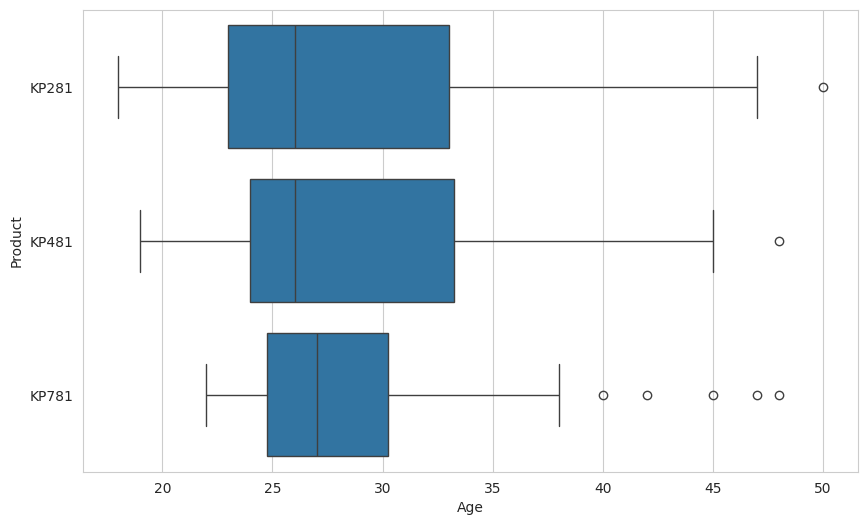

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age'], y=data['Product'])
plt.show()

In [98]:
#finding the age range for each model
def compute_percentiles(product):
    filtered_df = data[data["Product"] == product]  # Filter by product
    p25 = np.percentile(filtered_df["Age"], 25)  # 25th percentile
    p75 = np.percentile(filtered_df["Age"], 75)  # 75th percentile
    return p25, p75

# Compute for each product
products = ["KP281", "KP481", "KP781"]
percentiles = {prod: compute_percentiles(prod) for prod in products}

# Display results
for prod, (p25, p75) in percentiles.items():
    print(f"Product {prod}: 25th percentile = {p25}, 75th percentile = {p75}")

Product KP281: 25th percentile = 23.0, 75th percentile = 33.0
Product KP481: 25th percentile = 24.0, 75th percentile = 33.25
Product KP781: 25th percentile = 24.75, 75th percentile = 30.25


<font color='blue'>Observations from the Boxplot:</font>

<font color='green'>

* Age distribution in KP281 is maximum, followed by KP481, and KP781 respectively.

* There is only one outlier in KP281, followed by one and five outliers in KP481 and KP781 respectively.
* Buyer of KP281 is in the range of roughly 23 - 33 years.
* Buyer of KP481 is in the range of roughly 24 - 33.25 years.
* Buyer of KP781 is in the range of roughly 24.75 - 30.25 years.
</font>


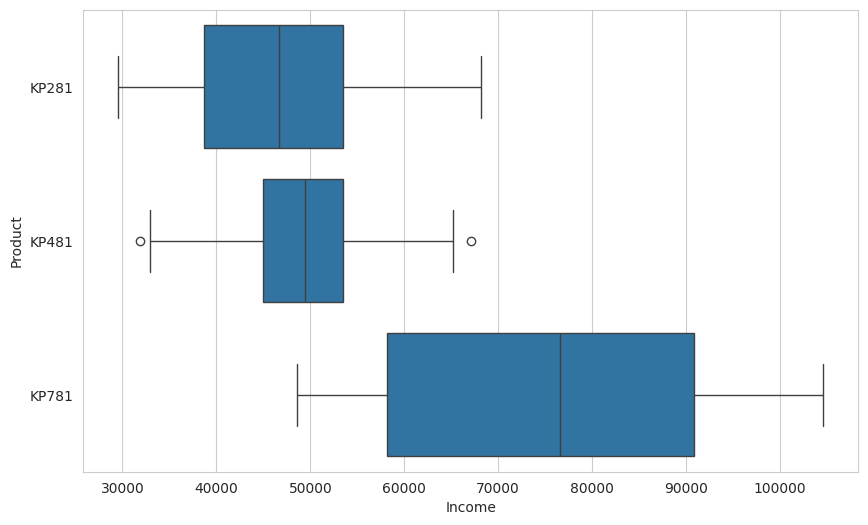

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Income'],y=data['Product'])
plt.show()

In [100]:
#finding the income range for each model
def compute_percentiles(product):
    filtered_df = data[data["Product"] == product]  # Filter by product
    p25 = np.percentile(filtered_df["Income"], 25)  # 25th percentile
    p75 = np.percentile(filtered_df["Income"], 75)  # 75th percentile
    return p25, p75

# Compute for each product
products = ["KP281", "KP481", "KP781"]
percentiles = {prod: compute_percentiles(prod) for prod in products}

# Display results
for prod, (p25, p75) in percentiles.items():
    print(f"Product {prod}: 25th percentile = {p25/1000}, 75th percentile = {p75/1000}")

Product KP281: 25th percentile = 38.658, 75th percentile = 53.439
Product KP481: 25th percentile = 44.9115, 75th percentile = 53.439
Product KP781: 25th percentile = 58.20475, 75th percentile = 90.886


<font color='blue'>Observations from the Boxplot:</font>

<font color='green'>

* Income distribution in KP781 is maximum, followed by KP281, and KP481 respectively.
*There is no outlier in KP781 and KP281, while KP481 has two outliers at extreme ends i.e., Lower IQR and Upper IQR.
*Income distribution of KP281 buyer is roughly between 39K - 53K dollars.
* Income distribution of KP481 buyer is roughly between 45K - 53K dollars.
* Income distribution of KP781 buyer is roughly between 58K - 91K dollars.
</font>


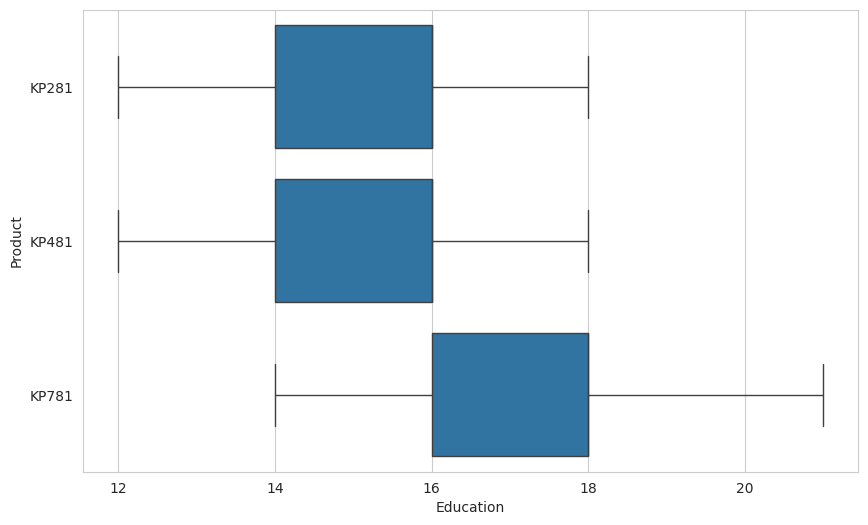

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Education'],y=data['Product'])
plt.show()

In [123]:
#finding the education range for each model
def compute_percentiles(product):
    filtered_df = data[data["Product"] == product]  # Filter by product
    p25 = np.percentile(filtered_df["Education"], 25)  # 25th percentile
    p75 = np.percentile(filtered_df["Education"], 75)  # 75th percentile
    return p25, p75

# Compute for each product
products = ["KP281", "KP481", "KP781"]
percentiles = {prod: compute_percentiles(prod) for prod in products}

# Display results
for prod, (p25, p75) in percentiles.items():
    print(f"Product {prod}: 25th percentile = {p25}, 75th percentile = {p75}")

Product KP281: 25th percentile = 14.0, 75th percentile = 16.0
Product KP481: 25th percentile = 14.0, 75th percentile = 16.0
Product KP781: 25th percentile = 16.0, 75th percentile = 18.0


<font color='blue'>Observations from the Boxplot:</font>

<font color='green'>

* Distributions of Education for all three models is same.
* Range of distribution for KP281 and KP481 is exactly same i.e., 14 - 16 years.
* Range of distribution for KP781 is between 16 - 18 years of education.
* There is no outlier for all three models.
* People with more education years tend to buy KP781
</font>


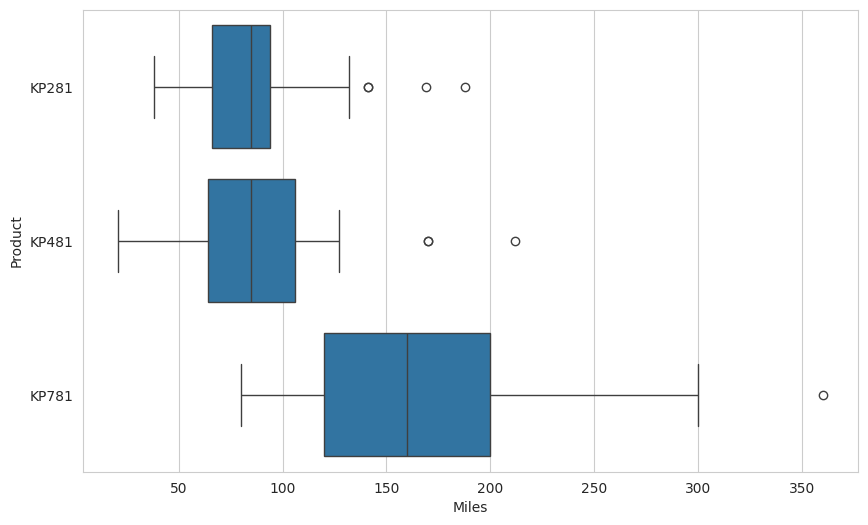

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Miles'],y=data['Product'])
plt.show()

In [126]:
#finding the miles range for each model
def compute_percentiles(product):
    filtered_df = data[data["Product"] == product]  # Filter by product
    p25 = np.percentile(filtered_df["Miles"], 25)  # 25th percentile
    p75 = np.percentile(filtered_df["Miles"], 75)  # 75th percentile
    return p25, p75

# Compute for each product
products = ["KP281", "KP481", "KP781"]
percentiles = {prod: compute_percentiles(prod) for prod in products}

# Display results
for prod, (p25, p75) in percentiles.items():
    print(f"Product {prod}: 25th percentile = {p25}, 75th percentile = {p75}")

Product KP281: 25th percentile = 66.0, 75th percentile = 94.0
Product KP481: 25th percentile = 64.0, 75th percentile = 106.0
Product KP781: 25th percentile = 120.0, 75th percentile = 200.0


<font color='blue'>Observations from the Boxplot:</font>

<font color='green'>

* Distribution of Miles is maximum in KP781, followed by KP481 and KP281, respectively.
* People tend to workout more on KP781, range is roughly between 120 Miles - 200 Miles.
* Range of Miles on KP481 is roughly between 64 - 106 Miles.
* Range of Miles on KP281 is roughly between 66 - 94 Miles.
* There is only one outlier in KP781 , followed by two and three in KP481 and KP281 respectively.
</font>


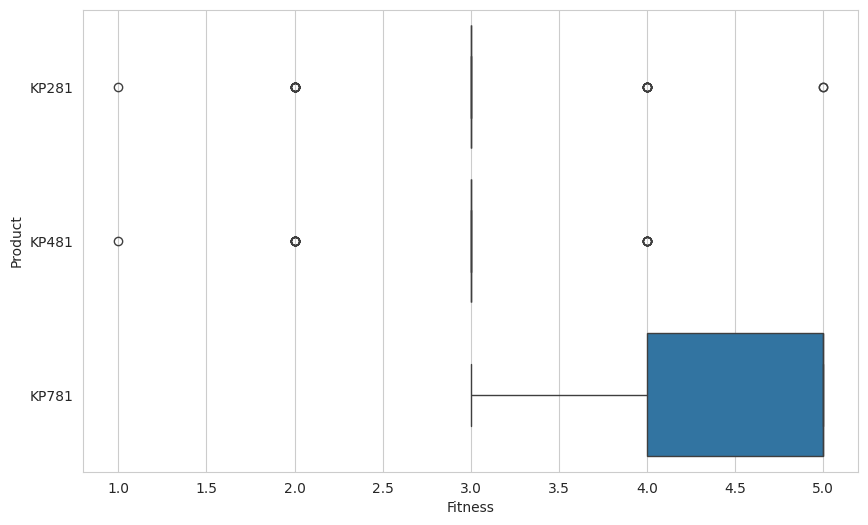

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Fitness'],y=data['Product'])
plt.show()

In [128]:
#finding the fitness range for each model
def compute_percentiles(product):
    filtered_df = data[data["Product"] == product]  # Filter by product
    p25 = np.percentile(filtered_df["Fitness"], 25)  # 25th percentile
    p75 = np.percentile(filtered_df["Fitness"], 75)  # 75th percentile
    return p25, p75

# Compute for each product
products = ["KP281", "KP481", "KP781"]
percentiles = {prod: compute_percentiles(prod) for prod in products}

# Display results
for prod, (p25, p75) in percentiles.items():
    print(f"Product {prod}: 25th percentile = {p25}, 75th percentile = {p75}")

Product KP281: 25th percentile = 3.0, 75th percentile = 3.0
Product KP481: 25th percentile = 3.0, 75th percentile = 3.0
Product KP781: 25th percentile = 4.0, 75th percentile = 5.0


<font color='blue'>Observations from the Boxplot:</font>

<font color='green'>

* Fitness Distribution of KP781 is maximum, while for KP281 and KP481 distribution is same.
* There's no outlier in fitness for KP781, while there's three and four outliers in KP481 and KP281, respectively.
* Fitness Median of KP281 and KP481 is same.
</font>


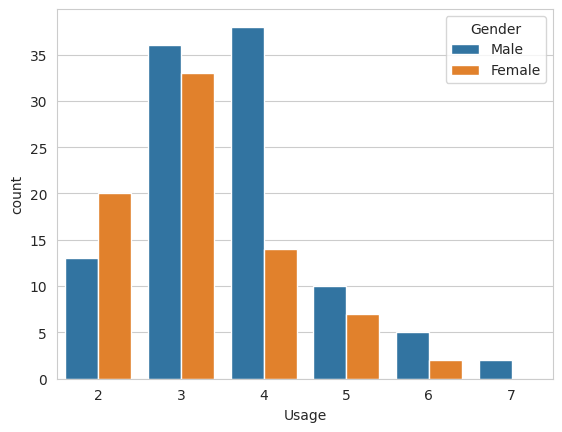

In [101]:
sns.countplot(data=data, x='Usage', hue='Gender')
plt.show()

<font color='blue'>Observations from the Countplot:</font>

<font color='green'>

* Majority of males seems to use treadmill 4 times per week.
* Followed by males using 3 times per week. Most of the women seems to use treadmills 3 times per week.
* Very few males use treadmills 7 times per week, while no female seems to using 7 times per week.
</font>

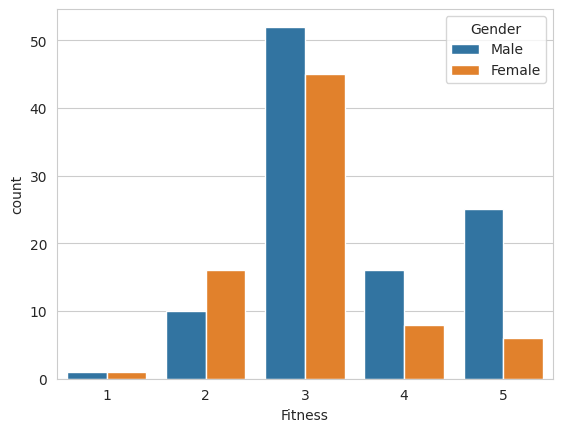

In [102]:
sns.countplot(data=data, x='Fitness', hue='Gender')
plt.show()

<font color='blue'>Observations from the Countplot:</font>

<font color='green'>

* Both genders are moderately fit (Fitness scale 3).
* There are more men who have self-rating of 5 compare to women.
* Distribution of self-rating 1 for both genders is roughly same.
* There are more women who have self-rating of 2 compare to men.
</font>

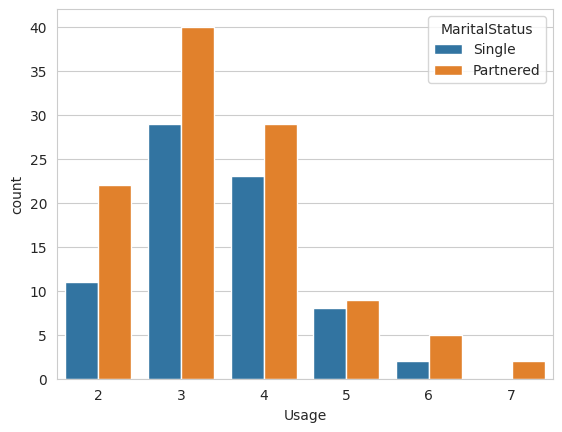

In [103]:
sns.countplot(data=data, x="Usage", hue='MaritalStatus')
plt.show()

<font color='blue'>Observations from the Countplot:</font>

<font color='green'>

* Overall usage of married couples is more compare to Singles.
* Irrespective of Martial Status, usage is 3 times per week. Followedby 4 times per week.
* Partnered status have small sample of doing workout 7 times per week, while no single people have more than 6 times per week.
</font>

<Axes: >

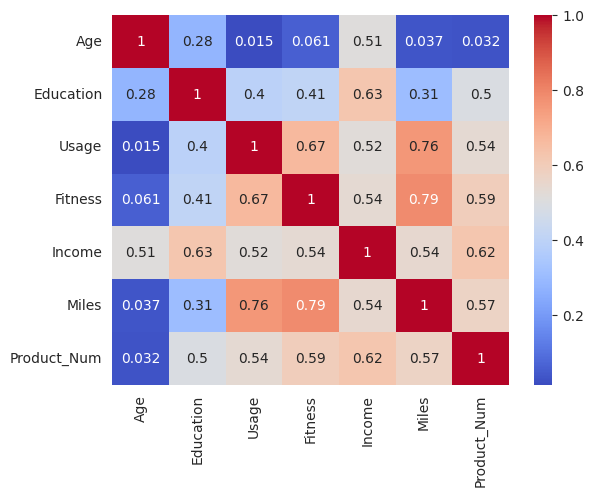

In [104]:
# Convert Product categories to numerical values
data["Product_Num"] = data["Product"].map({"KP281": 1, "KP481": 2, "KP781": 3})
corr_matrix=data.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

<font color='green'>Observations from the heatmap:</font>

<font color='blue'>
1.  Product vs. Income (0.62 Correlation)

Strong Positive Correlation: Higher-income customers are more likely to purchase the premium KP781 treadmill.
Business Insight: Target high-income groups for premium product marketing.
2. Product vs. Fitness (0.59 Correlation)

Moderate Positive Correlation: Customers with higher self-rated fitness prefer advanced treadmills.
Business Insight: Market KP781 to fitness enthusiasts and high-performance users.
3.  Product vs. Usage (0.54 Correlation)

Moderate Positive Correlation: Customers who plan to use the treadmill frequently prefer higher-end models.
Business Insight: Design subscription plans for heavy users and upsell premium equipment.
4. Product vs. Education (0.49 Correlation)

Moderate Positive Correlation: More educated customers tend to choose mid-to-premium models (KP481, KP781).
Business Insight: Use education-based messaging (e.g., health studies) to promote premium treadmills.
5. Age vs. Product (0.03 Correlation)

No Significant Correlation: Age does not strongly influence the treadmill model a customer selects.
Business Insight: Avoid age-based marketing—focus on other stronger predictors like income and fitness.

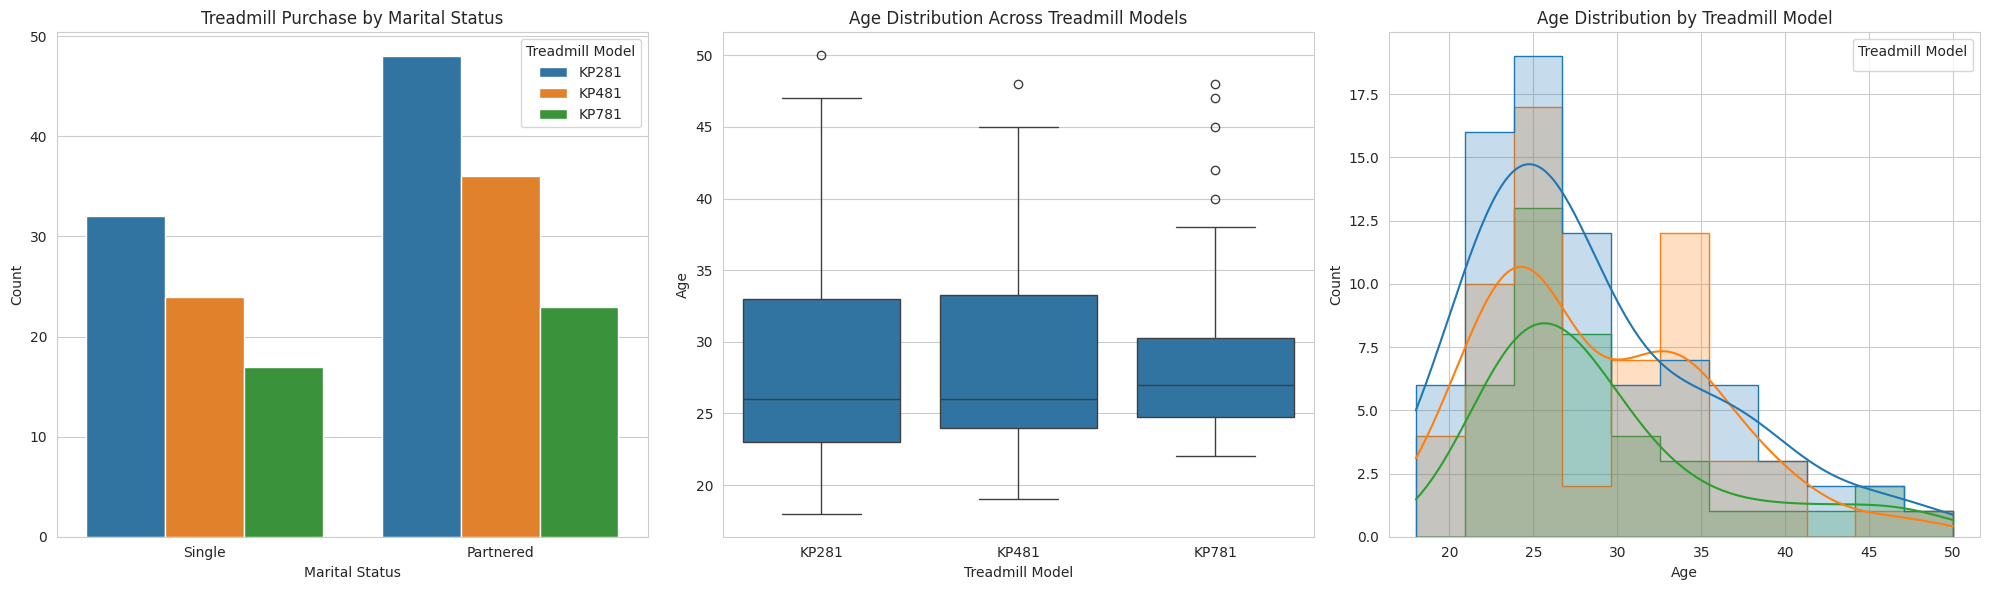

In [105]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))


sns.countplot(x="MaritalStatus", hue="Product", data=data, ax=axes[0])
axes[0].set_title("Treadmill Purchase by Marital Status")
axes[0].set_xlabel("Marital Status")
axes[0].set_ylabel("Count")
axes[0].legend(title="Treadmill Model")


sns.boxplot(x="Product", y="Age", data=data, ax=axes[1])
axes[1].set_title("Age Distribution Across Treadmill Models")
axes[1].set_xlabel("Treadmill Model")
axes[1].set_ylabel("Age")


sns.histplot(data, x="Age", hue="Product", kde=True, element="step", ax=axes[2])
axes[2].set_title("Age Distribution by Treadmill Model")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Count")
axes[2].legend(title="Treadmill Model")

plt.tight_layout()
plt.show()

<font color='green'>Inferences from the Visual Analysis:

<font color='blue'>
1. Marital Status vs. Product Purchased (Countplot)

Partnered (Married) customers are more likely to purchase KP481 (Mid-range).
Single customers prefer the KP281 (Entry-level) treadmill.
KP781 (Premium) has a balanced distribution across both groups but is less popular overall.
Insight:

Target partnered customers with mid-range products and offer family-oriented bundles.
Offer financing options to attract single customers to premium models.

2. Age Distribution Across Treadmill Models (Boxplot)

Age ranges are similar across all treadmill models.
No significant age difference exists between buyers of KP281, KP481, and KP781.
Insight:

Age is NOT a major factor influencing treadmill choice.
Avoid age-based marketing; instead, focus on other variables like income and fitness level.

3.  Age Distribution by Treadmill Model (Histogram)

All treadmill models have similar age distributions with no major skew.
KP781 (Premium) is bought by people across various age ranges, not just older users.
Insight:

Age has minimal effect on treadmill choice—no age-specific campaigns are necessary.


# **4. Marginal Probability**

In [106]:
product_probability=pd.crosstab(data['Product'],columns='Probability',normalize=True)*100
product_probability = product_probability.rename_axis(index=None, columns=None)
product_probability

,Probability
KP281,44.444444
KP481,33.333333
KP781,22.222222


<font color='green'>Marginal Probabilities of Products

<font color='blue'>

* Probability(KP281)=44.44%
* Probability(KP481)=33.33%
* Probability(KP781)=22.22%
</font>

**Most customers (44.44%) prefer the KP281 (Entry-Level) treadmill.**

In [107]:
gender_probility = pd.crosstab(data['Gender'], columns='Probability', normalize=True) * 100
gender_probility = gender_probility.rename_axis(index=None, columns=None)
gender_probility


,Probability
Female,42.222222
Male,57.777778


<font color='green'>Marginal Probabilities of Gender

<font color='blue'>

* Probability(Female)=42.22%
* Probability(Male)=57.77%
</font>

**Majority of customers (57.77%) are male**

In [108]:
MaritalStatus_probility = pd.crosstab(data['MaritalStatus'], columns='Probability', normalize=True) * 100
MaritalStatus_probility = MaritalStatus_probility.rename_axis(index=None, columns=None)
MaritalStatus_probility


,Probability
Partnered,59.444444
Single,40.555556


<font color='green'>Marginal Probabilities of Marital Status

<font color='blue'>

* Probability(Partnered)=59.44%
* Probability(Single)=40.55%
</font>

**Married customers(57.77%) are most likely to purchase**

In [109]:
data['Usage_Category'] = pd.cut(data['Usage'], bins=[0, 2, 4, 7], labels=['Low', 'Medium', 'High'])
usage_probability = pd.crosstab(data['Usage_Category'], columns='Probability', normalize=True) * 100
usage_probability = usage_probability.rename_axis(index=None, columns=None)
usage_probability

,Probability
Low,18.333333
Medium,67.222222
High,14.444444


<font color='green'>Marginal Probabilities of Usage

<font color='blue'>

* Probability(Low (1-2 times/week))=18.33%
* Probability(Medium (3-4 times/week))=67.22%
* Probability(High (5+ times/week))=14.44%
</font>

**Most customers (67.22%) plan to use their treadmill 3-4 times per week.**

In [110]:
data['Fitness_Category'] = pd.cut(data['Fitness'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])
fitness_probability = pd.crosstab(data['Fitness_Category'], columns='Probability', normalize=True) * 100
fitness_probability = fitness_probability.rename_axis(index=None, columns=None)
fitness_probability

,Probability
Low,15.555556
Medium,67.222222
High,17.222222


<font color='green'>Marginal Probabilities of Usage

<font color='blue'>

* Probability(Low (1-2))=15.55%
* Probability(Medium (3-4))=67.22%
* Probability(High (5))=17.22%
</font>

**Most customers (67.22%) rate their fitness as Medium.**

In [111]:
data['Income_Group'] = pd.qcut(data['Income'], q=3, labels=['Low Income', 'Medium Income', 'High Income'])
income_probability = pd.crosstab(data['Income_Group'], columns='Probability', normalize=True) * 100
income_probability = income_probability.rename_axis(index=None, columns=None)
income_probability

,Probability
Low Income,35.000000
Medium Income,34.444444
High Income,30.555556


<font color='green'>Marginal Probabilities of Income Groups

<font color='blue'>

* Probability(Low Income)=35%
* Probability(Medium Income)=34.44%
* Probability(High Income)=30.55%
</font>

**Customers are evenly distributed across income groups, with slightly more from low-income(35%) backgrounds.**

# **5. Joint Probability**

In [112]:
pd.crosstab(data['Gender'],data['Product'],normalize=True)

Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


<font color='green'>Joint Probability, P(Product Intersection Gender)</font>


* Probability that customer buys KP281 and gender is Male, P(KP281 Intersection Male) = 0.22.
* Probability that customer buys KP481 and gender is Male, P(KP481 Intersection Male) = 0.17.
* Probability that customer buys KP781 and gender is Male, P(KP781 Intersection Male) = 0.18.
* Probability that customer buys KP281 and gender is Female, P(KP281 Intersection Female) = 0.22.
* Probability that customer buys KP481 and gender is Female, P(KP481 Intersection Female) = 0.16.
* Probability that customer buys KP781 and gender is Female, P(KP781 Intersection Female) = 0.039.

In [113]:
pd.crosstab(data['MaritalStatus'],data['Product'],normalize=True)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.266667,0.200000,0.127778
Single,0.177778,0.133333,0.094444


<font color='green'>Joint Probability, P(Product Intersection MartialStatus)</font>


* Probability of customer buying KP281 and their MartialStatus is Single, P(KP281 Intersection Single) = 0.18.
* Probability of customer buying KP481 and their MartialStatus is Single, P(KP481 Intersection Single) = 0.13.
* Probability of customer buying KP781 and their MartialStatus is Single, P(KP781 Intersection Single) = 0.094.
* Probability of customer buying KP281 and their MartialStatus is Partnered, P(KP281 Intersection Partnered) = 0.27.
* Probability of customer buying KP481 and their MartialStatus is Partnered, P(KP481 Intersection Partnered) = 0.2.
* Probability of customer buying K7281 and their MartialStatus is Partnered, P(KP781 Intersection Partnered) = 0.13.

In [114]:
pd.crosstab(data['Fitness'],data['Product'],normalize=True)

Product,KP281,KP481,KP781
Fitness,,,
1,0.005556,0.005556,0.000000
2,0.077778,0.066667,0.000000
3,0.300000,0.216667,0.022222
4,0.050000,0.044444,0.038889
5,0.011111,0.000000,0.161111


<font color='green'>Joint Probability P(Product Intersection Fitness)</font>

* Probability of buying KP281 and their fitness rating is 5, P(KP281 Intersection Fitness=5) = 0.0011.
* Probability of buying KP281 and their fitness rating is 4, P(KP281 Intersection Fitness=4) = 0.05.
* Probability of buying KP281 and their fitness rating is 3, P(KP281 Intersection Fitness=3) = 0.3.
* Probability of buying KP281 and their fitness rating is 2, P(KP281 Intersection Fitness=2) = 0.078.
* Probability of buying KP281 and their fitness rating is 1, P(KP281 Intersection Fitness=1) = 0.0056.
* Probability of buying KP481 and their fitness rating is 5, P(KP481 Intersection Fitness=5) = 0.0 (impossible event).
* Probability of buying KP481 and their fitness rating is 4, P(KP481 Intersection Fitness=4) = 0.0044.
* Probability of buying KP481 and their fitness rating is 3, P(KP481 Intersection Fitness=3) = 0.22.
* Probability of buying KP481 and their fitness rating is 2, P(KP481 Intersection Fitness=2) = 0.067.
* Probability of buying KP481 and their fitness rating is 1, P(KP481 Intersection Fitness=1) = 0.0056.
* Probability of buying KP781 and their fitness rating is 5, P(KP781 Intersection Fitness=5) = 0.16.
* Probability of buying KP781 and their fitness rating is 4, P(KP781 Intersection Fitness=4) = 0.039.
* Probability of buying KP781 and their fitness rating is 3, P(KP781 Intersection Fitness=3) = 0.022.
* Probability of buying KP781 and their fitness rating is 2, P(KP781 Intersection Fitness=2) = 0.0 (impossible event).
* Probability of buying KP781 and their fitness rating is 1, P(KP781 Intersection Fitness=1) = 0.0 (impossible event).

# **6. Conditional Probability**

In [115]:
pd.crosstab(data['Gender'],data['Product'],normalize='index')*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769


<font color='green'>Conditional Probability, P(Product | Gender)

* Probability of buying KP281 given that the customer is male, P(
Product=KP281 | Customer=Male) = 38%.

* Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 30%.

* Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 32%.

* Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 53%.

* Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 38%.

* Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 9%.

In [116]:
pd.crosstab(data['Gender'],data['Product'],normalize='columns')*100

Product,KP281,KP481,KP781
Gender,,,
Female,50.0,48.333333,17.5
Male,50.0,51.666667,82.5


<font color='green'>Conditional Probability, P(Gender | Product)</font>

* Probability that customer is Male given that he bought KP281, P(Customer=Male | Producty=KP281) = 50%.

* Probability that customer is Female given that she bought KP281, P(Customer=Female | Product=KP281) = 50%.

* Probability that customer is Male given that he bought KP481, P(Customer=Male | Product=KP481) = 52%.

* Probability that customer is Female given that she bought KP481, P(Customer=Female | Product=KP481) = 48%.

* Probability that customer is Male given that he bought KP781, P(Customer=Male | Product=781) = 82%.

* Probability that customer is Female given that he bought KP781, P(Customer=Female | Product=KP781) = 17%.



In [117]:
pd.crosstab(data['MaritalStatus'],data['Product'],normalize='index')*100

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,44.859813,33.644860,21.495327
Single,43.835616,32.876712,23.287671


<font color='green'>Conditional Probability, P(Product | MaritalStatus)</font>

* Probability of buying KP281 given that the marital status is single, P(Product=KP281 | MaritalStatus=Single) = 44%.

* Probability of buying KP481 given that the marital status is single, P(Product=KP481 | MaritalStatus=Single) = 33#.

* Probability of buying KP781 given that the marital status is single, P(Product=781 | MaritalStatus=Single) = 23%.

* Probability of buying KP281 given that the marital status is partnered, P(Product=KP281 | MaritalStatus=Single) = 45%.

* Probability of buying KP481 given that the cmarital status is partnered, P(Product=KP481 | MaritalStatus=Single) = 34%.

* Probability of buying KP781 given that the marital status is partnered, P(Product=KP781 | MaritalStatus=Single) = 21%.

In [118]:
pd.crosstab(data['MaritalStatus'],data['Product'],normalize='columns')*100

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,60.0,60.0,57.5
Single,40.0,40.0,42.5


<font color='green'>Conditional Probability P(MaritalStatus | Product)</font>

* Probability of Marital Status being Single given that KP281 is purchased, P(MaritalStatus=Single | Product=KP281) = 40%.
* Probability of Marital Status being Parterned given that KP281 is purchased, P(MaritalStatus=Parterned | Product=KP281) = 60%.
* Probability of Marital Status being Single given that KP481 is purchased, P(MaritalStatus=Single | Product=KP481) = 40%.
* Probability of Marital Status being Partnered given that KP481 is purchased, P(MaritalStatus=Partnered | Product=KP481) = 60%.
* Probability of Marital Status being Single given that KP781 is purchased, P(MaritalStatus=Single | Product=KP781 ) = 42%.
* Probability of Marital Status being Partnered given that KP781 is purchased, P(MaritalStatus=Partnered | Product=KP781 ) = 57%.

In [119]:
pd.crosstab(data['Fitness'],data['Product'],normalize='index')*100

Product,KP281,KP481,KP781
Fitness,,,
1,50.000000,50.000000,0.000000
2,53.846154,46.153846,0.000000
3,55.670103,40.206186,4.123711
4,37.500000,33.333333,29.166667
5,6.451613,0.000000,93.548387


<font color='green'>Conditional Probability P(Product | Fitness)</font>

* Probability of customer buying KP281 given fitness rating is 5, P(Product=KP281 | Fitness=5) = 6%.
* Probability of customer buying KP481 given fitness rating is 5, P(Product=KP481 | Fitness=5) = 0% (impossible event).
* Probability of customer buying KP781 given fitness rating is 5, P(Product=KP781 | Fitness=5) = 94%.
* Probability of customer buying KP281 given fitness rating is 4, P(Product=KP281 | Fitness=4) = 38%.
* Probability of customer buying KP481 given fitness rating is 4, P(Product=KP481 | Fitness=4) = 33%.
* Probability of customer buying KP781 given fitness rating is 4, P(Product=KP781 | Fitness=4) = 29%.
* Probability of customer buying KP281 given fitness rating is 3, P(Product=KP281 | Fitness=3) = 56%.
* Probability of customer buying KP481 given fitness rating is 3, P(Product=KP481 | Fitness=3) = 40%.
* Probability of customer buying KP781 given fitness rating is 3, P(Product=KP781 | Fitness=3) = 4%.
* Probability of customer buying KP281 given fitness rating is 2, P(Product=KP281 | Fitness=2) = 54%.
* Probability of customer buying KP481 given fitness rating is 2, P(Product=KP481 | Fitness=2) = 46%.
* Probability of customer buying KP781 given fitness rating is 2, P(Product=KP781 | Fitness=2) = 0% (impossible event).
* Probability of customer buying KP281 given fitness rating is 1, P(Product=KP281 | Fitness=1) = 50%.
* Probability of customer buying KP481 given fitness rating is 1, P(Product=KP481 | Fitness=1) = 50%.
* Probability of customer buying KP781 given fitness rating is 1, P(Product=KP781 | Fitness=1) = 0% (impossible event).

In [120]:
pd.crosstab(data['Fitness'],data['Product'],normalize='columns')*100

Product,KP281,KP481,KP781
Fitness,,,
1,1.25,1.666667,0.0
2,17.50,20.000000,0.0
3,67.50,65.000000,10.0
4,11.25,13.333333,17.5
5,2.50,0.000000,72.5


<font color='green'>Conditional Probability P(Fitness | Product)</font>

* Probability of customer fitness rating is 5 given that they purchased KP281, P(Fitness=5 | Product=KP281) = 2.5%.
* Probability of customer fitness rating is 4 given that they purchased KP281, P(Fitness=4 | Product=KP281) = 11%.
* Probability of customer fitness rating is 3 given that they purchased KP281, P(Fitness=3 | Product=KP281) = 68%.
* Probability of customer fitness rating is 2 given that they purchased KP281, P(Fitness=2 | Product=KP281) = 17%.
* Probability of customer fitness rating is 1 given that they purchased KP281, P(Fitness=1 | Product=KP281) = 1.3%.
* Probability of customer fitness rating is 5 given that they purchased KP481, P(Fitness=5 | Product=KP481) = 0 (impossible event).
* Probability of customer fitness rating is 4 given that they purchased KP481, P(Fitness=4 | Product=KP481) = 13%.
* Probability of customer fitness rating is 3 given that they purchased KP481, P(Fitness=3 | Product=KP481) = 65%.
* Probability of customer fitness rating is 2 given that they purchased KP481, P(Fitness=2 | Product=KP481) = 2%.
* Probability of customer fitness rating is 1 given that they purchased KP481, P(Fitness=1 | Product=KP481) = 1.7%.
* Probability of customer fitness rating is 5 given that they purchased KP781, P(Fitness=5 | Product=KP781) = 72%.
* Probability of customer fitness rating is 4 given that they purchased KP781, P(Fitness=4 | Product=KP781) = 17%.
* Probability of customer fitness rating is 3 given that they purchased KP781, P(Fitness=3 | Product=KP781) = 10%.
* Probability of customer fitness rating is 2 given that they purchased KP781, P(Fitness=2 | Product=KP781) = 0% (impossible event).
* Probability of customer fitness rating is 1 given that they purchased KP781, P(Fitness=1 | Product=KP781) = 0% (impossible event).

# **6. Conclusions**

<font color='green'>Business Insights(based on Non-Graphical and Visual Analysis):</font>

* The top three purchased treadmill models are KP281, KP481, and KP781, in that order.
* There is a higher proportion of male buyers compared to female buyers.
More customers are in a partnered marital status compared to single.
* The average age of customers is 28, with a range between 18 to 50 years and a median of 26 years.
* The average education level of customers is 15.5 years, with a range between 2 to 21 years and a median of 16 years.
* On average, customers plan to use the treadmill three times per week, with a range between 2 to 7 times per week and a median of three times per week.
* The average self-fitness rating of customers is 3, with a range between 1 to 5 and a median of 3.
* Customers' average annual income is 53.7K dollars, with a range between 29.5K dollars to 104K dollars and a median income of 50.5K dollars.
* The average distance traveled by customers on the treadmill is 103 miles, with a range between 21 to 360 miles and a median of 94 miles.
* There is a moderately strong relationship between education and income.
* The relationship between fitness and distance traveled on the treadmill is strong.
* Similarly, there is a strong relationship between usage frequency and distance traveled on the treadmill.
* The age difference between the 25th and 75th percentile is nine years, indicating a relatively narrow age spread among customers.
* The education years difference between the 25th and 75th percentile is two years, suggesting a moderate spread in education levels among customers.
* Most customers use the treadmill 3-4 times per week, with very few using it 6-7 times per week.
* The majority of customers rate themselves as moderately fit.
* The mean income for KP281 buyers is 46.4K dollars, for KP481 buyers is 48.9K dollars, and for KP781 buyers is 75.4K dollars.
* KP281 and KP481 have the same mean usage of 3, while KP781 has a mean usage of 4.
* The mean fitness rating for KP281 and KP481 buyers is 3, while for KP781 buyers, it is 4.6.
* KP781 is the most preferred treadmill among male customers, while females show the least preference for it.
* Overall, male customers tend to use treadmills more frequently than females.
* The income distribution between both genders is roughly similar.
Males tend to have a higher fitness level compared to females.
* The distance traveled on the treadmill is roughly the same for both genders, but men tend to cover longer distances, with some going beyond 320 miles.
* Partnered customers tend to have a higher fitness level compared to singles.

<font color='red'>**Customer Profiling- Categorization of Users**

**KP281**

* KP281 stands as the top-selling treadmill model, contributing to 44.44% of total sales.
* The average income of KP281 buyers is 46.4K dollars.
* Customers using KP281 have an average planned usage of three times per week.
* KP281 customers demonstrate an average fitness rating of 3 (rounded).
* Both genders equally favor the KP281 model as their preferred treadmill choice.
* The age range of KP281 buyers falls approximately between 22 to 33 years.
* The income range of KP281 treadmill customers typically lies between 39K dollars to 53K dollars.
* The education level of KP281 buyers ranges from 14 to 16 years.
* On the KP281 treadmill, customers cover an approximate distance of 66 to 94 miles.
* The median/mean fitness rating for KP281 users remains at 3.
* Single female customers slightly outnumber single male customers in KP281 purchases, while partnered male customers bought KP281 slightly more than single male customers.

**KP481**

* KP481 is the second highest-selling treadmill model, accounting for 33.33% of sales.
* Customers purchasing KP481 have an average income of 49K dollars.
* The average planned usage of KP481 customers is three times per week.
* KP481 customers have an average fitness rating of 3.
* The KP481 model is slightly more popular among male buyers.
* Couples are more likely to buy the KP481 model than single customers.
* The age range of KP481 treadmill customers is typically between 24-34 years.
* The income range of KP481 customers is approximately 45K dollars - 53K dollars.
* The educational background of KP481 buyers is similar to that of KP281, spanning 14 - 16 years of education.
* KP481 customers typically cover a distance of about 64 - 106 miles on the treadmill, making it the second most frequently used model in terms of distance.
* The median/mean fitness rating for KP481 customers is 3, similar to KP281.
* The purchase probabilities show no significant gender-based or marital status-based differences for KP481 buyers.

**KP781**

* KP781 is a less commonly purchased treadmill model due to its higher price.
* The average income of KP781 buyers is 75.4K dollars.
* KP781 customers use the treadmill an average of four times per week.
* The average fitness rating of KP781 buyers is 4.
* KP781 is predominantly preferred by males, while fewer females buy this model.
* The KP781 treadmill is not popular among both single and partnered customers.
* The age range of KP781 buyers is approximately between 25-30 years, and it has seen relatively fewer purchases, possibly due to its higher cost.
* The income range for KP781 buyers is roughly between 58K dollars to 91K dollars, showing a wider range compared to KP281 & KP481 models.
* KP781 buyers typically have an education level ranging from 16 to 18 years, and there is a high correlation between education and income, potentially influencing the purchase decision.
* KP781 customers typically cover a distance of about 120 - 200 miles on the treadmill, making it the most frequently used model in terms of distance.
* KP781's fitness range is between 4 - 5, making it more attractive to people who are already fit and seeking additional features.
* Partnered females are more likely to buy KP781 treadmills compared to partnered males, whereas single male customers show a higher preference for KP781 compared to single females.

<font color='red'>**Recommendations**


* Promote KP281 and KP481 treadmills as budget-friendly options, especially targeting customers with annual incomes in the range of 39K - 53K Dollars.
* Market KP781 treadmill as a premium product with advanced features, targeting professionals and athletes.
* Enhance the marketing strategy for KP781 by associating it with renowned athletes like Neeraj Chopra, leveraging their achievements for better outreach.
* Run special marketing campaigns on Women's Day and Mother's Day to encourage more women to adopt an exercise routine, highlighting the benefits of using our treadmills.
* Conduct research to expand the customer base beyond 50 years of age. Offer basic treadmill models (KP281/KP481) as suitable options for beginners in this age group.
* Encourage existing customers to upgrade their treadmills to high-end models as their usage increases over time, leading to increased revenue for the business.

#**The link to the colab file**

https://colab.research.google.com/drive/1yPWjAkDWvvZ_iQM6Of9xQA9NC7Xekc-b?usp=sharing